## Develop Hough Transform

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import numpy as np

def Hough_line(img):
    thetas = np.deg2rad(np.arange(0.0, 90.0))
    width, height = img.shape
    diag_len = np.ceil(np.sqrt(width * width + height * height))
    rhos = np.linspace(0, diag_len, diag_len)

    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    accumulator = np.zeros( (int(diag_len), int(num_thetas)), dtype=np.uint64)
    y_idxs, x_idxs = np.nonzero(img)

    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

    for t_idx in range(num_thetas):
        rho = np.abs((x * cos_t[t_idx] - y * sin_t[t_idx]))
        rho1=int(rho)
        accumulator[rho1, t_idx] += 1

    return accumulator

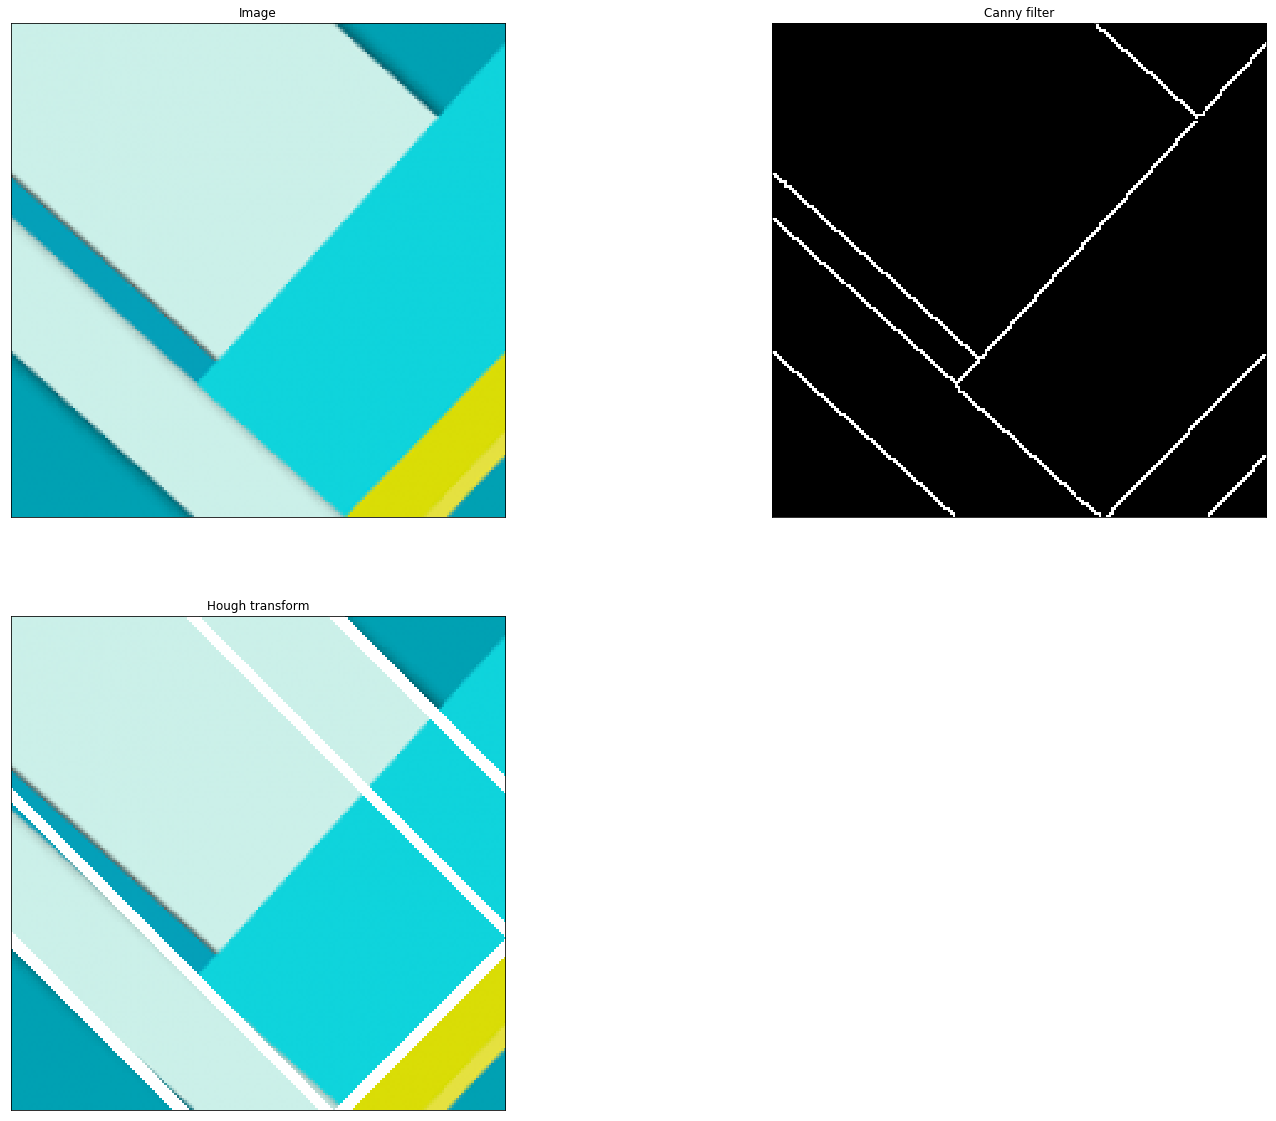

63.0
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  2.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [4]:
import numpy as np
import matplotlib.image as img
import cv2
from matplotlib import pyplot as plt
from skimage import data
from skimage import feature
from math import cos
from math import sin
import math
from sklearn.preprocessing import MinMaxScaler

#img = img.imread('./build.jpg')
img = data.load('mat.png', as_grey = 0)
img_copy = img
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(img_gray,50,150,apertureSize = 3)
h_arr = np.zeros((7250,181))
i1,j1 = edges.shape
for y in range(1,i1):
    for x in range(1,j1):
        if edges[x,y]==255:
            for theta in range(1,181):
                rho = x*cos(math.radians(theta)) + y*sin(math.radians(theta))
                rho = int(rho*10)
                if rho>=0:
                    h_arr[rho,theta]=h_arr[rho,theta]+1
                if rho<0:
                    h_arr[-rho,theta]=h_arr[-rho,theta]+1
                                          

for rho2 in range(0,7250):
    for theta2 in range(0,181):
        if h_arr[rho2,theta2] > 30:
            rho3 = rho2/10
            a = np.cos(math.radians(theta2))
            b = np.sin(math.radians(theta2))
            x0 = a*rho3
            y0 = b*rho3
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 -1000*(a))
            cv2.line(img_copy,(x1,y1),(x2,y2),(255,0,0),2)
            cv2.line(img_copy,(y1,x1),(y2,x2),(255,0,0),2)
      

scler = MinMaxScaler()
scler.fit(h_arr)
h_img = scler.transform(h_arr)
img = data.load('mat.png', as_grey = 0)
fig = plt.figure(figsize=(25,20))
plt.subplot(221),plt.imshow(img)
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(edges, cmap = 'gray')
plt.title('Canny filter'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img_copy, cmap = 'gray')
plt.title('Hough transform'), plt.xticks([]), plt.yticks([])
plt.show()
print(np.max(h_arr))
print(h_arr)